In [17]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import xgboost as xgb

%matplotlib inline

In [18]:
pd.get_option('display.max_columns')
# 20

32

In [19]:
pd.set_option('display.max_columns', 32)

In [20]:
df = pd.read_csv('train_V2.csv').dropna()
df_test = pd.read_csv('test_V2.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 1017.8+ MB


In [7]:
# df.apply(pd.Series.value_counts) aa
df.isnull().sum()
#df[df.winPlacePerc.isnull()]

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [8]:
len(df[df.rankPoints == -1])

1701810

In [9]:
df.matchId.value_counts()

aa2ebdfb282816    100
4c614a57e015d7    100
08b38d4699bb67    100
ff18efb7d98d98    100
ece7b4f8da5e70    100
ebc443c4298e7a    100
5c95d8ccc8d4a3    100
951e75fc35d758    100
54408fced5c0d9    100
92b36116799b98    100
148a2213035f36    100
82e46bac295eb1    100
f035acf4a49fdd    100
09d895b2a30c6a    100
9d3a07ebf4c89a    100
2b16e4ef18fdb2    100
fe1be8e33af055    100
9e3b3dc28e0adf    100
f0c1de80afa8e7    100
9a356968b25ff1    100
8d537e706a864b    100
7f49b2f144bf03    100
6e50a7c2b6a43c    100
aefc47a20d3c7d    100
5249d49f0b6d33    100
ea6879d2ad9767    100
ca01b5485ded73    100
35308c4a45322f    100
1a6c60e444f5d1    100
f581e38fa84bb5    100
                 ... 
8c889c32f1490e      8
a46b1598692634      8
ce4a6dc88c487c      8
cf214bd1cc1dda      8
8772c5274a0630      8
cedb9e88b4b255      8
378847703cc63b      8
71af975b5e9a8a      8
29616490381297      8
9e7dcc7b9a5162      8
e3c824e12ff949      8
b854116387dfbd      8
37989d2861a855      8
1f251de6c42568      7
998a86ce7e

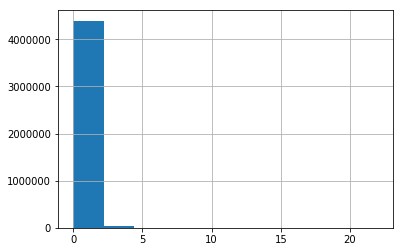

In [10]:
df.assists.hist()

In [6]:
df_test.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')

In [22]:
df = df[0:2000]

In [23]:
X_train = df[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']]
y_train = df['winPlacePerc']

In [24]:
model = xgb.XGBClassifier(seed=2019)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2019,
       silent=True, subsample=1)

In [25]:
%time model.fit(X_train, y_train)

CPU times: user 1min, sys: 15.9 ms, total: 1min
Wall time: 1min


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2019,
       silent=True, subsample=1)

In [ ]:
#%time y_pred = model.predict(X_test)